In [1]:
pwd

'C:\\Users\\tvimal\\Desktop'

In [ ]:
import scikitplot as skplt
import teradata
import pandas as pd
host,user,pwd ='10.132.4.11','id', "password"
udaExec =teradata.UdaExec (appName="HelloWorld", version="1.0",logConsole=False)
with udaExec.connect(method="ODBC", system=host,username=user,password=pwd) as session:
    query = '''SELECT * from dw_ckm.Training_cas '''
    data = pd.read_sql(query,session)  
#print(df.columns.tolist()) #columns 
data.shape 

# EVALUATING THE MODEL

# ROC

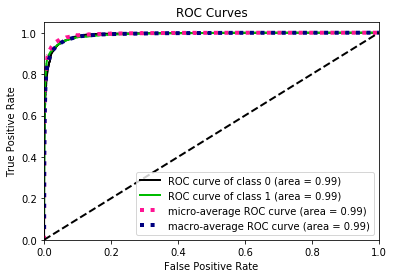

In [66]:
y_pred_test  = Classifier.predict_proba(X_test)
skplt.metrics.plot_roc (y_test,y_pred_nn)

# GAIN_CURVE

C:\Users\tvimal\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


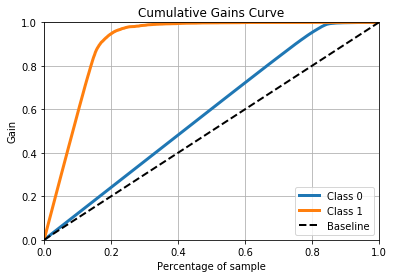

In [68]:
y_pred_test  = Classifier.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(y_test,y_pred_nn)

# LIFT_CURVE

C:\Users\tvimal\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


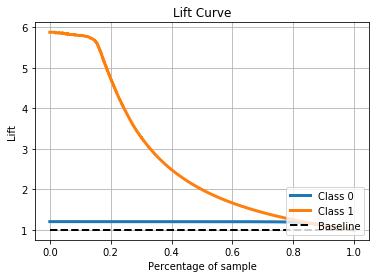

In [69]:
y_pred_test  = Classifier.predict_proba(X_test)
skplt.metrics.plot_lift_curve(y_test,y_pred_nn)

# KS_STATS

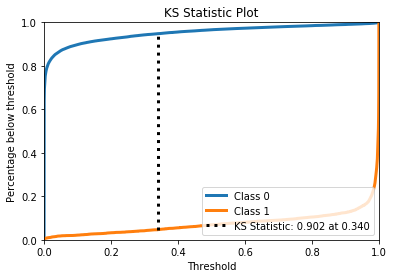

In [70]:
y_pred_test  = Classifier.predict_proba(X_test)
skplt.metrics.plot_ks_statistic(y_test,y_pred_nn)
plt.show()

# PROBABILITY

(0, 1)

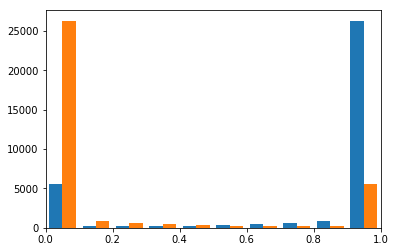

In [71]:
#we can seethe probability of the predicted values
import matplotlib.pyplot as plt
plt.rcParams['font.size']=10
#histogram
plt.hist(y_pred_nn,bins=10)
plt.xlim(0,1)

# LEARNING CURVE

In [ ]:
skplt.estimators.plot_learning_curve(model_pred, x_train,y_train)#model_pred -use model wieghts
plt.show()

# PRECISION RECALL CURVE

C:\Users\tvimal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=DeprecationWarning)


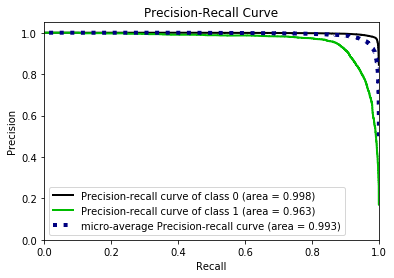

In [73]:
y_pred_test  =Classifier.predict_proba(X_test)
skplt.metrics.plot_precision_recall_curve(y_test, y_pred_nn)
plt.show()

In [74]:
gini_index=2*90# roc value
gini_index

180

# RESPONDERS AND NON RESPONDERS CORRECTLY PREDICTED

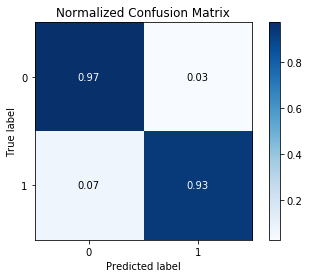

In [75]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred1, normalize=True)
plt.show()

# CLASSIFICATION REPORT

In [76]:
print(metrics.classification_report(y_test, y_pred1))

             precision    recall  f1-score   support

          0       0.99      0.97      0.98     29162
          1       0.85      0.93      0.89      5977

avg / total       0.96      0.96      0.96     35139



# FEATURE IMPORTANCE

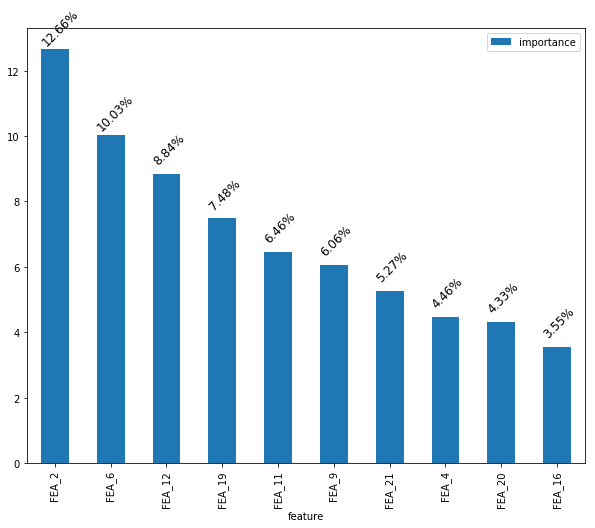

In [78]:
#Feature selection
from sklearn.ensemble import RandomForestClassifier

names = train_data.columns
rf = RandomForestClassifier().fit(x_train,y_train)
rf.fit(x_train,y_train)
#print ("Features sorted by their score:")
#print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_),names),reverse=True))
importances = pd.DataFrame({'feature':x.columns,'importance':np.round(rf.feature_importances_,4)*100})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
ax=importances.iloc[:10,:].plot.bar(figsize=(10,8))
#plt.figure(figsize=(30,25))
#importances
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03,i.get_height()+1,\
            str(round((i.get_height()/100)*100, 2))+'%', fontsize=12,color='black',rotation=45)#total)*100
